'''
Date: 5/7/23
Author: Dylan Compton
Program: Homework11a.py
'''
## This code was downloaded from https://github.com/josephlee94/intuitive-deep-learning and is not my own original work.

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6883 - accuracy: 0.5470 - val_loss: 0.6885 - val_accuracy: 0.4932
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5861 - val_loss: 0.6818 - val_accuracy: 0.5708
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6429 - val_loss: 0.6750 - val_accuracy: 0.6256
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6712 - val_loss: 0.6685 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7094 - val_loss: 0.6629 - val_accuracy: 0.6986
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7515 - val_loss: 0.6578 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7720 - val_loss: 0.6527 - val_accuracy: 0.7397
Epoch 8/100
3

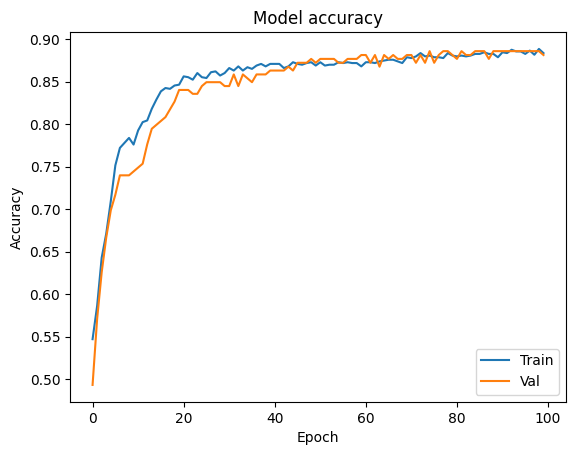

In [4]:
df = pd.read_csv("houseprices.csv")
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 0.4680 - accuracy: 0.7808 - val_loss: 0.4051 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3420 - accuracy: 0.8562 - val_loss: 0.4167 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2986 - accuracy: 0.8748 - val_loss: 0.3551 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2799 - accuracy: 0.8914 - val_loss: 0.3159 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2658 - accuracy: 0.8806 - val_loss: 0.2922 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2455 - accuracy: 0.8973 - val_loss: 0.3346 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2242 - accuracy: 0.9139 - val_loss: 0.3816 - val_accuracy: 0.8676
Epoch 

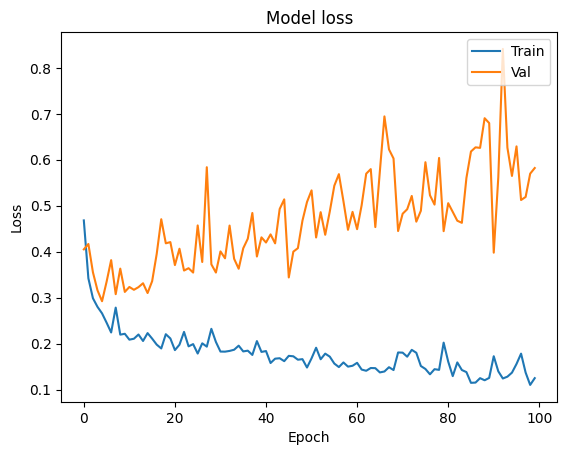

KeyError: 'acc'

In [5]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [6]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Epoch 1/100
32/32 [==============================] - 3s 46ms/step - loss: 14.2568 - accuracy: 0.6380 - val_loss: 3.9130 - val_accuracy: 0.7443
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 1.6714 - accuracy: 0.8317 - val_loss: 0.7119 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5705 - accuracy: 0.8503 - val_loss: 0.6024 - val_accuracy: 0.8128
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5146 - accuracy: 0.8679 - val_loss: 0.5984 - val_accuracy: 0.8037
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5029 - accuracy: 0.8571 - val_loss: 0.5107 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4940 - accuracy: 0.8503 - val_loss: 0.5358 - val_accuracy: 0.8356
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4756 - accuracy: 0.8767 - val_loss: 0.4803 - val_accuracy: 0.8904
Epoch